In [11]:
import pandas as pd
from matplotlib import pyplot as plt
from datetime import timedelta, datetime
import numpy as np

In [4]:
%matplotlib inline

In [2]:
data = pd.read_csv("../assets/data_prep_majority.txt", sep="\t")

In [47]:
data.head()

,Flight,Date,Equipment_Type,Equipment_Reg,Origin_City,Origin_Code,Destination_City,Destination_Code,Flight Time,ETD,ETA,ATD,ATA,Carrier_Name,Carrier_Class,Timedelta,ETD_Group
0,BA423,2020-10-20,A320,G-EUUS,Amsterdam,AMS,London,LHR,0:45,7:45,8:05,7:48,07:33,British Airways,0,-32,Morning
1,BA423,2020-10-19,A320,G-EUUJ,Amsterdam,AMS,London,LHR,0:38,7:55,8:15,7:59,07:37,British Airways,0,-38,Morning
2,BA423,2020-10-18,A320,G-EUUD,Amsterdam,AMS,London,LHR,0:58,8:00,8:20,7:58,07:56,British Airways,0,-24,Morning
3,BA423,2020-10-17,A320,G-EUYF,Amsterdam,AMS,London,LHR,0:45,7:55,8:15,8:08,07:53,British Airways,0,-22,Morning
4,BA423,2020-10-16,A320,G-EUUI,Amsterdam,AMS,London,LHR,0:45,7:45,8:05,7:52,07:38,British Airways,0,-27,Morning


In [48]:
len(data)

158496

In [50]:
max(data.Date), min(data.Date)

('2020-10-23', '2017-10-22')

In [7]:
len(data.Flight.unique())

231

In [8]:
len(data.Equipment_Type.unique())

43

In [9]:
len(data.Origin_City.unique())

21

In [10]:
len(data.Destination_City.unique())

12

In [11]:
len(data.Carrier_Name.unique())

13

In [12]:
len(data.Carrier_Class.unique())

2

In [48]:
max(data.Timedelta)

59

In [28]:
tdelta = data.ATA.apply(lambda x: datetime.strptime(x, '%H:%M')) - \
     data.ETD.apply(lambda x: datetime.strptime(x, '%H:%M'))

In [45]:
## 2k flights arrived before they started...
sum(tdelta.dt.days == -1), len(tdelta.dt.days)

(1982, 158496)

In [6]:
x = data.Carrier_Name.unique()
y = data.Origin_Code.unique()
len(x), len(y)

(13, 24)

In [7]:
values = data.groupby(["Carrier_Name", "Origin_Code"]).mean().Timedelta

In [8]:
values

Carrier_Name  Origin_Code
Aer Lingus    DUB            -8.416210
              LHR            -6.376005
              SNN             3.000000
Air Europa    AMS            -1.992239
              BCN           -14.531915
                               ...    
Vueling       AMS             5.934641
              BCN            -2.545006
              CPH             1.925255
              DUB            11.040639
              MAD           -17.662069
Name: Timedelta, Length: 90, dtype: float64

In [9]:
values["Aer Lingus", "DUB"]

-8.416209866875489

In [10]:
len(values)

90

In [34]:
heatmap = np.zeros((len(y), len(x)))

In [38]:
for i_1, val_1 in enumerate(y):
    for i_2, val_2 in enumerate(x):
        try:
            heatmap[i_1, i_2] = values[val_2, val_1]
            # print(values[val_1, val_2])
        except KeyError:
            # print(0)
            heatmap[i_1, i_2] = 0 

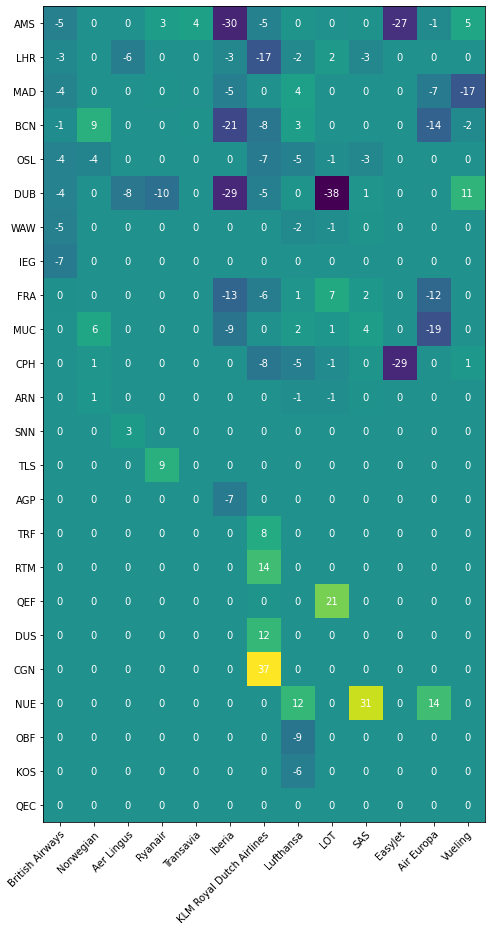

In [45]:
# from https://matplotlib.org/gallery/images_contours_and_fields/image_annotated_heatmap.html

fig, ax = plt.subplots(figsize=(15,15))
im = ax.imshow(heatmap)

# We want to show all ticks...
ax.set_xticks(np.arange(len(x)))
ax.set_yticks(np.arange(len(y)))
# ... and label them with the respective list entries
ax.set_xticklabels(x)
ax.set_yticklabels(y)

# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

# Loop over data dimensions and create text annotations.
for i in range(len(y)):
    for j in range(len(x)):
        text = ax.text(j, i, int(heatmap[i, j]),
                       ha="center", va="center", color="w")

#fig.tight_layout()
plt.show()


In [ ]:
# how do real flight times deviate for destinations? (planes need to cirlce)

In [64]:
data["Route"] = data["Origin_Code"] + "-" + data["Destination_Code"]

In [67]:
# sorted(data.Route.unique())
len(data.Route.unique())

92

In [75]:
"2:36".split(":")

['2', '36']

In [76]:
def hours_to_int(hours):
    if hours.startswith("0:"):
        return int(hours.split(":")[1])
    else:
        mins = int(hours.split(":")[1])
        h = int(hours.split(":")[0])
        return h*60 + mins

In [79]:
hours_to_int("0:43"), hours_to_int("3:36")

(43, 216)

In [81]:
data["FlightTimeMin"] = data["Flight Time"].apply(hours_to_int)

In [85]:
data[["FlightTimeMin", "Flight Time"]]

,FlightTimeMin,Flight Time
0,45,0:45
1,38,0:38
2,58,0:58
3,45,0:45
4,45,0:45
...,...,...
158491,114,1:54
158492,117,1:57
158493,120,2:00
158494,115,1:55


In [101]:
routes = data.groupby("Route")

In [96]:
#data.Route.unique()

In [109]:
routes.groups

{'AGP-MAD': Int64Index([37984], dtype='int64'),
 'AMS-BCN': Int64Index([ 34902,  34903,  34904,  34905,  34906,  34907,  34908,  34909,
              34910,  34911,
             ...
             157108, 157109, 157110, 157111, 157112, 157113, 157114, 157115,
             157116, 157117],
            dtype='int64', length=3224),
 'AMS-CPH': Int64Index([ 44969,  44970,  44971,  44972,  44973,  44974,  44975,  44976,
              44977,  44978,
             ...
             146263, 146264, 146265, 146266, 146267, 146268, 146269, 146270,
             146271, 146272],
            dtype='int64', length=4498),
 'AMS-DUB': Int64Index([31138, 31139, 31140, 31141, 31142, 31143, 31144, 31145, 31146,
             31147,
             ...
             66365, 66366, 66367, 66368, 66369, 66370, 66371, 66372, 66373,
             66374],
            dtype='int64', length=2821),
 'AMS-FRA': Int64Index([ 61731,  61732,  61733,  61734,  61735,  61736,  61737,  61738,
              61739,  61740,
         

In [115]:
pd.set_option("display.max.rows", 100)

In [166]:
routes_stats = routes.agg(["count", "min", "max", "mean", "std"])
routes_stats["FlightTimeMin"][["count", "mean", "std"]][routes_stats["FlightTimeMin"]["std"] > 10]
## what's up with ARN-CPH ?  

,count,mean,std
Route,,,
AMS-DUB,2821,75.990074,25.238421
AMS-LHR,3533,51.645344,23.726563
ARN-BCN,103,188.747573,10.579038
ARN-CPH,2018,56.444995,61.253500
CPH-BCN,883,148.439411,10.050863
LHR-FRA,5138,64.873297,27.522431
LHR-LHR,3,79.000000,25.632011
LHR-WAW,3509,120.649758,19.831161
MAD-BCN,1307,51.964040,38.334760


In [158]:
route = "MAD-BCN"

In [167]:
route = "BCN-MAD"

<AxesSubplot:>

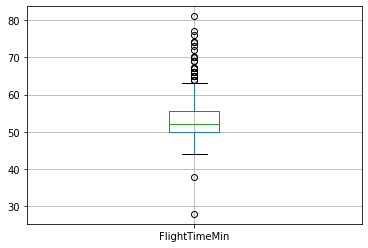

In [170]:
data[data.Route == route].boxplot("FlightTimeMin")

In [168]:
## which carriers at this route?
data[data.Route == route].Carrier_Name.unique()

array(['Iberia', 'Air Europa', 'Vueling'], dtype=object)

In [169]:
data[data.Route == route].iloc[np.argsort(data[data.Route == route].FlightTimeMin.values)]

,Flight,Date,Equipment_Type,Equipment_Reg,Origin_City,Origin_Code,Destination_City,Destination_Code,Flight Time,ETD,ETA,ATD,ATA,Carrier_Name,Carrier_Class,Timedelta,ETD_Group,Route,FlightTimeMin
153196,UX7706,2019-05-04,A332,EC-JQQ,Barcelona,BCN,Madrid,MAD,0:28,12:00,13:35,12:29,12:56,Air Europa,0,-39,Morning,BCN-MAD,28
153197,UX7706,2019-05-03,B788,EC-MLT,Barcelona,BCN,Madrid,MAD,0:38,12:00,13:35,12:20,12:58,Air Europa,0,-37,Morning,BCN-MAD,38
35930,IB2105,2020-09-03,A321,EC-ILP,Barcelona,BCN,Madrid,MAD,0:44,21:35,23:00,21:42,22:26,Iberia,0,-34,Night,BCN-MAD,44
41498,IB935,2020-07-06,A20N,EC-NDN,Barcelona,BCN,Madrid,MAD,0:44,9:35,11:00,10:36,11:20,Iberia,0,20,Morning,BCN-MAD,44
152857,UX7706,2020-10-08,B788,EC-MNS,Barcelona,BCN,Madrid,MAD,0:44,11:50,13:20,12:12,12:56,Air Europa,0,-24,Morning,BCN-MAD,44
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152965,UX7706,2020-01-15,A332,EC-LQO,Barcelona,BCN,Madrid,MAD,1:14,11:45,13:15,12:00,13:14,Air Europa,0,-1,Morning,BCN-MAD,74
36000,IB2105,2018-10-27,A319,EC-KBX,Barcelona,BCN,Madrid,MAD,1:14,21:05,22:30,21:27,22:42,Iberia,0,12,Evening,BCN-MAD,74
153035,UX7706,2019-10-14,A332,EC-JZL,Barcelona,BCN,Madrid,MAD,1:16,11:50,13:25,12:10,13:25,Air Europa,0,0,Morning,BCN-MAD,76
153013,UX7706,2019-11-28,A332,EC-JZL,Barcelona,BCN,Madrid,MAD,1:17,11:45,13:15,12:14,13:31,Air Europa,0,16,Morning,BCN-MAD,77


In [ ]:
# how do estimated flight times deviate between airlines for the same routes?

In [207]:
data["ExpTime"] = data.ETA.apply(hours_to_int) - data.ETD.apply(hours_to_int)

In [209]:
data[data.ExpTime < 0].head()

,Flight,Date,Equipment_Type,Equipment_Reg,Origin_City,Origin_Code,Destination_City,Destination_Code,Flight Time,ETD,ETA,ATD,ATA,Carrier_Name,Carrier_Class,Timedelta,ETD_Group,Route,FlightTimeMin,ExpTime
7319,BA461,2017-12-12,A321,G-EUXL,Madrid,MAD,London,LHR,2:19,20:28,19:15,18:12,19:31,British Airways,0,16,Evening,MAD-LHR,139,-73
14071,BA767,2017-12-06,A319,G-EUOB,Oslo,OSL,London,LHR,1:57,19:14,18:05,17:17,18:14,British Airways,0,9,Evening,OSL-LHR,117,-69
22982,DY4252,2020-10-16,B738,SE-RPT,Barcelona,BCN,Stockholm,ARN,3:16,20:40,0:15,20:51,00:07,Norwegian,1,-8,Evening,BCN-ARN,196,-1225
22984,DY4252,2020-10-09,B738,SE-RPS,Barcelona,BCN,Stockholm,ARN,3:02,20:40,0:15,21:18,00:20,Norwegian,1,5,Evening,BCN-ARN,182,-1225
22986,DY4252,2020-10-02,B738,SE-RPR,Barcelona,BCN,Stockholm,ARN,2:57,20:40,0:15,21:41,00:37,Norwegian,1,22,Evening,BCN-ARN,177,-1225


In [210]:
exp_time = data[data.ExpTime > 0]

In [214]:
len(exp_time)

157686

In [211]:
routes = exp_time.groupby("Route")

In [216]:
routes_stats = routes.agg(["count", "min", "max", "mean", "std"])
routes_stats["ExpTime"][["count", "mean", "std"]][routes_stats["ExpTime"]["std"] > 5]

,count,mean,std
Route,,,
ARN-FRA,2820,130.354610,5.205783
DUB-LHR,2815,89.797513,5.412435
DUB-WAW,35,241.714286,10.141851
FRA-MAD,2872,162.353760,8.125165
FRA-WAW,2831,99.005652,5.964438
LHR-LHR,3,100.000000,10.000000
LHR-MAD,3182,207.075110,5.166485
LHR-WAW,3509,210.094899,6.366500
MAD-MUC,2581,152.123596,5.482727


In [226]:
route = "DUB-WAW"


In [227]:
max(exp_time.ExpTime[exp_time.Route == route]), min(exp_time.ExpTime[exp_time.Route == route])

(300, 240)

In [229]:
# exp_time[exp_time.Route == route].head()

In [300]:
## expcted flight times on airline level

# groupby route
carrier_exp_time = exp_time.groupby(["Route"])

# filter routes with only one carrier
exp_time = carrier_exp_time.filter(lambda g: len(g["Carrier_Name"].unique()) > 1)

carrier_exp_time = exp_time.groupby(["Route"])
# normalize (min-max-scaling) flight time per route
def min_max_scaler(x):
    num = x - min(x)
    denom = max(x) - min(x)
    if denom == 0:
        return (x/x - 1)
    return num/denom
    
exp_time["ExpTimeNorm"] = carrier_exp_time["ExpTime"].apply(min_max_scaler)

# plot route times per airline
#exp_time.groupby("Carrier_Name").mean()["ExpTimeNorm"]

In [303]:
# carrier_exp_time.nunique()["Carrier_Name"]

In [304]:
carrier_exp_table = exp_time.groupby("Carrier_Name").agg(["mean"])["ExpTimeNorm"]
exp_time.groupby("Carrier_Name").agg(["count", "mean"])["ExpTimeNorm"]

,count,mean
Carrier_Name,,
Aer Lingus,4046,0.495065
Air Europa,6944,0.685196
British Airways,18026,0.651010
EasyJet,21,0.904762
Iberia,5735,0.730681
KLM Royal Dutch Airlines,20790,0.460511
LOT,12725,0.759742
Lufthansa,33038,0.382540
Norwegian,4316,0.541087


<AxesSubplot:xlabel='Carrier_Name'>

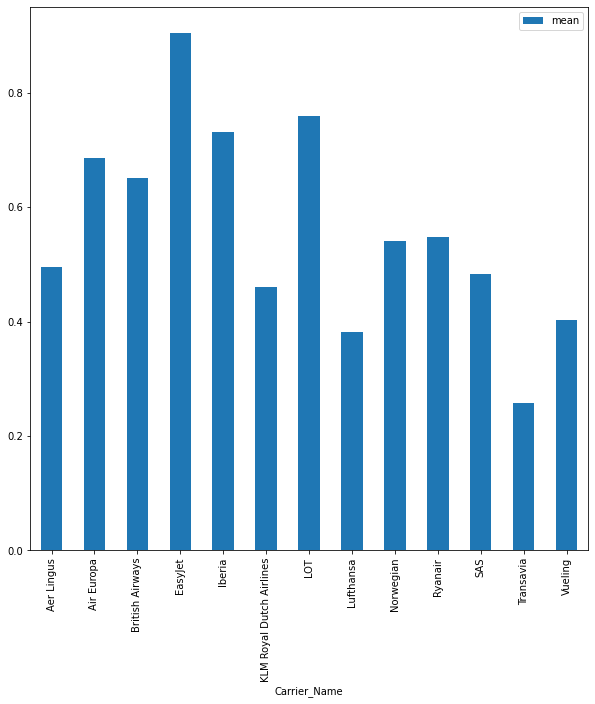

In [305]:
carrier_exp_table.plot.bar(figsize=(10,10))

In [318]:
carrier_exp_table["mean"].values

array([0.49506499, 0.68519585, 0.65101018, 0.9047619 , 0.73068055,
       0.46051141, 0.75974158, 0.38254013, 0.54108743, 0.54758657,
       0.48317826, 0.25672515, 0.40281729])

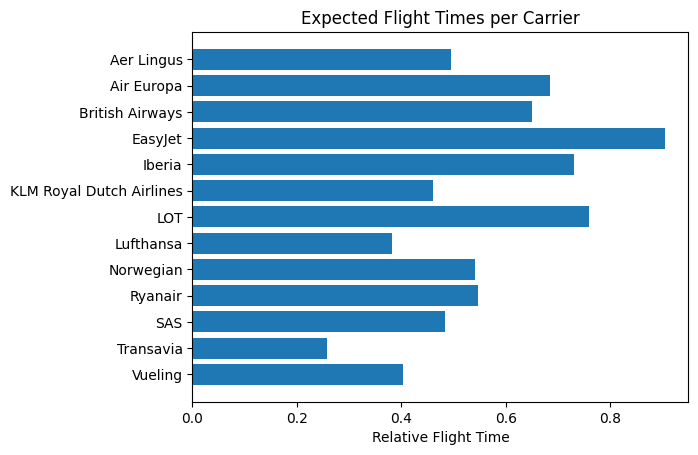

In [319]:
# from https://matplotlib.org/gallery/lines_bars_and_markers/barh.html#sphx-glr-gallery-lines-bars-and-markers-barh-py
import matplotlib.pyplot as plt
import numpy as np


plt.rcdefaults()
fig, ax = plt.subplots()

# Example data
people = carrier_exp_table.index
y_pos = np.arange(len(people))
performance = carrier_exp_table["mean"].values


ax.barh(y_pos, performance, align='center')
ax.set_yticks(y_pos)
ax.set_yticklabels(people)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Relative Flight Time')
ax.set_title('Expected Flight Times per Carrier')

plt.show()

In [ ]:
# follow the individual planes (Equipment_Reg)